# Proyecto Mineria de Datos TEL354
#### Profesor: Mauricio Araya
#### Estudiantes: Phillipa Paredes - Francisco Lopez - Francisca Soto


## Tiroteos desde el 2016 al 2021

#### Cargamos la data y revisamos la cantidad de victimas en los tiroteos

In [1]:
import pandas as pd
df_shooting1=pd.read_csv('Mass_shooting_data.csv')
df_shooting1

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,1978561,"April 15, 2021",District of Columbia,Washington,1800 block of West Virginia Ave NE,0,4,NaN
1,1978635,"April 15, 2021",Indiana,Indianapolis,8951 Mirabel Rd,8,5,NaN
2,1978652,"April 15, 2021",Illinois,Chicago,600 block of N Sawyer Ave,0,4,NaN
3,1978616,"April 15, 2021",Florida,Pensacola,700 Truman Ave,0,6,NaN
4,1976538,"April 13, 2021",Maryland,Baltimore,2300 block of Hoffman St,0,4,NaN
...,...,...,...,...,...,...,...,...
1995,634238,"August 20, 2016",Connecticut,Hamden,903 Dixwell Ave,0,4,NaN
1996,634731,"August 20, 2016",Washington,Tacoma,900 block of Pacific Avenue,0,5,NaN
1997,634819,"August 20, 2016",Alabama,Citronelle,Jim Platt Road,5,0,NaN
1998,632747,"August 18, 2016",Connecticut,Waterbury,402 E Main Street,0,4,NaN


In [2]:
#df_shooting1.columns.values
df_shooting1.describe()
df_shooting1.dtypes


Incident ID         int64
Incident Date      object
State              object
City Or County     object
Address            object
# Killed            int64
# Injured           int64
Operations        float64
dtype: object

In [3]:
df_shooting1_order = df_shooting1.sort_values('# Injured')
df_shooting1_order

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
1145,1320286,"February 3, 2019",California,Palm Springs,E Sunny Dunes Rd and El Placer Rd,4,0,NaN
1223,1233663,"October 15, 2018",Tennessee,Columbia,1075 Carters Creek Pike,5,0,NaN
849,1521226,"October 7, 2019",Massachusetts,Abington,135 Centre Ave,5,0,NaN
868,1512486,"September 21, 2019",Ohio,Cleveland,3616 East 144th St,4,0,NaN
166,1908063,"December 8, 2020",West Virginia,Williamsburg,611 Flynns Creek Rd,6,0,NaN
...,...,...,...,...,...,...,...,...
397,1758966,"August 9, 2020",District of Columbia,Washington,3300 block of Dubois Pl SE,1,21,NaN
930,1466705,"August 3, 2019",Texas,El Paso,7101 Gateway Blvd,23,23,NaN
894,1492441,"August 31, 2019",Texas,Odessa,8250 TX 191,8,23,NaN
1677,879953,"July 1, 2017",Arkansas,Little Rock,220 W 6th St,0,25,NaN


Ordenamos la data segun la cantidad de heridos, se puede apreciar que el tiroteo en Las Vegas involucro una gran cantidad de victimas. Se realizará grafico ajustando la visualizacion de los ejes ya que sabemos que este tiroteo sobresale de los demas datos.

In [4]:
df_shooting1['Incident Date'] = pd.to_datetime(df_shooting1['Incident Date'])
#df_shooting1.dtypes
df_shooting1.mean()

C:\Users\franf\AppData\Local\Temp/ipykernel_16836/4217021868.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_shooting1.mean()
C:\Users\franf\AppData\Local\Temp/ipykernel_16836/4217021868.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_shooting1.mean()


Incident ID    1.372291e+06
# Killed       1.051000e+00
# Injured      4.275000e+00
Operations              NaN
dtype: float64

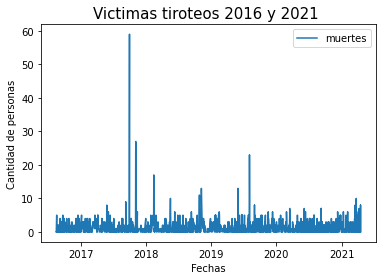

<Figure size 720x720 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
plt.plot(df_shooting1['Incident Date'],df_shooting1['# Killed'],label="muertes")
#plt.plot(df_shooting1['Incident Date'],df_shooting1['# Injured'],label="heridos")

plt.title("Victimas tiroteos 2016 y 2021 ",fontsize=15)
plt.xlabel("Fechas",fontsize=10)
plt.ylabel("Cantidad de personas",fontsize=10)
plt.legend()
plt.figure(figsize=(10,10))
plt.show()

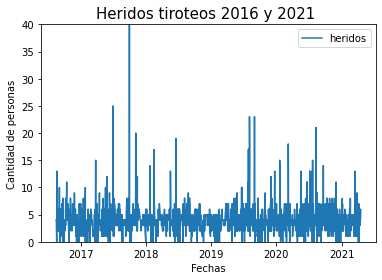

<Figure size 720x720 with 0 Axes>

In [6]:
plt.plot(df_shooting1['Incident Date'],df_shooting1['# Injured'],label="heridos")
plt.title("Heridos tiroteos 2016 y 2021 ",fontsize=15)
plt.ylim(0, 40)
plt.xlabel("Fechas",fontsize=10)
plt.ylabel("Cantidad de personas",fontsize=10)
plt.legend()
plt.figure(figsize=(10,10))
plt.show()

###### El tiroteo del primero de octubre 2017 se registra un tiroteo en las vegas en un concierto el cual hasta ese momento fue el segundo atentado mas grande luego del atentado de las torres gemelas.

In [7]:
#agrupar por estado 
df_shooting1.dtypes

Incident ID                int64
Incident Date     datetime64[ns]
State                     object
City Or County            object
Address                   object
# Killed                   int64
# Injured                  int64
Operations               float64
dtype: object

Para comparar y analizar la data, agruparemos por estado, la cual nos ayudará a comparar entre estados y zonas.

In [8]:
state_group=df_shooting1.groupby(['State'])
state_group.sum()

,Incident ID,# Killed,# Injured,Operations
State,,,,
Alabama,68698942,61,212,0.0
Alaska,5339272,5,8,0.0
Arizona,28248870,25,74,0.0
Arkansas,42727168,24,135,0.0
California,244713031,214,755,0.0
Colorado,41623282,36,112,0.0
Connecticut,25945048,12,86,0.0
Delaware,11854421,8,29,0.0
District of Columbia,47098201,18,163,0.0


In [9]:
state_group.mean()

,Incident ID,# Killed,# Injured,Operations
State,,,,
Alabama,1.296206e+06,1.150943,4.000000,NaN
Alaska,1.779757e+06,1.666667,2.666667,NaN
Arizona,1.412444e+06,1.250000,3.700000,NaN
Arkansas,1.424239e+06,0.800000,4.500000,NaN
California,1.294778e+06,1.132275,3.994709,NaN
Colorado,1.486546e+06,1.285714,4.000000,NaN
Connecticut,1.297252e+06,0.600000,4.300000,NaN
Delaware,1.481803e+06,1.000000,3.625000,NaN
District of Columbia,1.427218e+06,0.545455,4.939394,NaN


Generaremos el dataframe al cual le añadiremos el indice para ordenar, ya que inicialmente utiliza el estado como indice. Además debemos arreglar la data. Como utilizaremos este dataframe comenzaremos a añadir nuevos datos como la poblacion, cantidad de leyes, entre otras.

In [10]:
state_group.size()
states=pd.DataFrame(state_group.size())
states=states.assign(index="0")
index=0
for i,row in states.iterrows():
    states.loc[i,'index']=index
    index+=1
states

,0,index
State,,
Alabama,53,0
Alaska,3,1
Arizona,20,2
Arkansas,30,3
California,189,4
Colorado,28,5
Connecticut,20,6
Delaware,8,7
District of Columbia,33,8


In [11]:
states['State']=states.index
states.set_index('index',inplace=True)

states.columns=['Shootings','State']
states

,Shootings,State
index,,
0,53,Alabama
1,3,Alaska
2,20,Arizona
3,30,Arkansas
4,189,California
5,28,Colorado
6,20,Connecticut
7,8,Delaware
8,33,District of Columbia


Buscamos dataframe que contenga la densidad de población al año 2021, donde encontramos una data del covid19 donde se tiene la densidad de poblacion hasta ese año.

In [12]:
#densidad poblacion
covid=pd.read_csv('covid_data.csv')
covid

,State,Total State Population (2021),Total COVID-19 Cases (As of 09/17/2021),Percentage of population infected,COVID-19 Cases per capita (As of 09/17/2021),COVID-19 Deaths,Death Rate,Population Density (2020),Total cases rank,Per Capita Rank,...,Per capita vs density difference,Mask Mandate Start,Mask Mandate End,Total Mask Days,Party,Vaccination Rate (1 dose),Vaccination Rate (2 dose),Vaccine Rank,SDOHi 2019,Well-Being Index 2019
0,California,39613493,4610847,11.64%,11669,66994,1.45%,252.74,1,8,...,-4,"June 18, 2020",None,458,D,70.4%,57.5%,17,6,10
1,Texas,29730311,3908248,13.15%,13479,59959,1.53%,39.54,2,22,...,-19,"July 3, 2020","March 10, 2021",250,R,58.7%,49.5%,33,31,20
2,Florida,21944577,3473873,15.83%,16174,50811,1.46%,405.45,3,40,...,31,None,None,0,R,65.8%,55.6%,22,23,7
3,New York,19299981,2356680,12.21%,12114,54574,2.32%,410.32,4,10,...,2,"April 15, 2020",None,522,D,69.6%,62.1%,9,2,22
4,Illinois,12569321,1586741,12.62%,12522,27113,1.71%,226.73,5,12,...,-1,"May 1, 2020",None,427,D,67.4%,52.5%,26,12,15
5,Georgia,10830007,1519522,14.03%,14312,24460,1.61%,186.26,6,27,...,9,None,None,0,R,53.5%,43.5%,46,39,40
6,Pennsylvania,12804123,1365049,10.66%,10663,28768,2.11%,285.73,7,1,...,-10,"April 17, 2020","June 28, 2021",438,D,71.1%,56.7%,20,18,28
7,Ohio,11714618,1327614,11.33%,11358,21265,1.60%,286.19,8,5,...,-5,"July 23, 2020","June 2, 2021",315,R,53.4%,49.3%,34,34,37
8,North Carolina,10701022,1322587,12.36%,12610,15520,1.17%,218.04,9,13,...,-2,"June 26, 2020","May 14, 2021",323,D,58%,48.3%,37,38,31
9,Tennessee,6944260,1171722,16.87%,17158,14289,1.22%,112.40,10,42,...,17,None,None,0,R,51.6%,43.8%,45,41,35


In [13]:
pop_states = covid[['State', 'Total State Population (2021)']]
pop_states

,State,Total State Population (2021)
0,California,39613493
1,Texas,29730311
2,Florida,21944577
3,New York,19299981
4,Illinois,12569321
5,Georgia,10830007
6,Pennsylvania,12804123
7,Ohio,11714618
8,North Carolina,10701022
9,Tennessee,6944260


In [14]:
states_pop_shoots= pd.merge(pop_states,states, on=["State"])
states_pop_shoots

,State,Total State Population (2021),Shootings
0,California,39613493,189
1,Texas,29730311,131
2,Florida,21944577,125
3,New York,19299981,83
4,Illinois,12569321,214
5,Georgia,10830007,60
6,Pennsylvania,12804123,103
7,Ohio,11714618,78
8,North Carolina,10701022,61
9,Tennessee,6944260,65


<AxesSubplot:xlabel='[Shootings]', ylabel='[Total State Population (2021)]'>

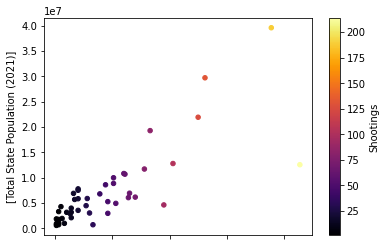

In [15]:
#import seaborn as sns
states_pop_shoots.plot.scatter(['Shootings'], ['Total State Population (2021)'],c='Shootings', cmap='inferno')

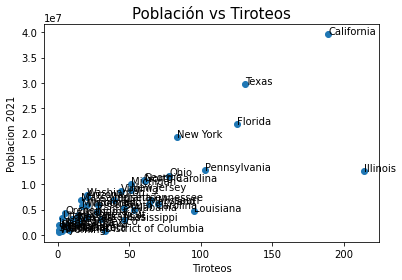

<Figure size 1800x1800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
plt.scatter(states_pop_shoots['Shootings'],states_pop_shoots['Total State Population (2021)'])

for i in states_pop_shoots['State'].keys():
    iso= states_pop_shoots['State'][i]
    plt.annotate(iso, ( states_pop_shoots['Shootings'][i],states_pop_shoots['Total State Population (2021)'][i]))

plt.title("Población vs Tiroteos",fontsize=15)    
plt.xlabel("Tiroteos",fontsize=10)
plt.ylabel("Poblacion 2021",fontsize=10)
#plt.legend()
plt.figure(figsize=(25,25))
fig = plt.figure()
#fig.set_figheight(25)
#fig.set_figwidth(30)


De las graficas anteriores podemos ver que a medida de que aumenta la población aumentan los tiroteos por lo que realizaremos matrices de correlacion para comprobar la idea.

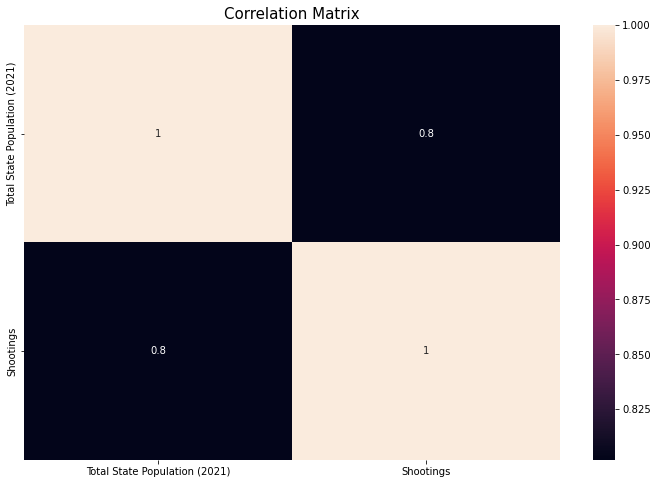

In [17]:
import seaborn as sns

corr = states_pop_shoots.corr()
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix", fontsize = 15)
plt.show()

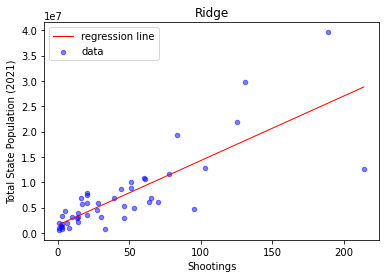

<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = states_pop_shoots[['Shootings']]
y = states_pop_shoots[['Total State Population (2021)']]
xvals=np.linspace(X.min(),X.max(),200)

def train_and_plot(regr_type,d=1,a=0.1):
    gen_poly_terms = PolynomialFeatures(degree=d)
    if regr_type=="Lasso":
        poly_regression = Lasso(alpha=a)
    elif regr_type=="Ridge":
        poly_regression = Ridge(alpha=a)
    X_train = gen_poly_terms.fit_transform(X)
    poly_regression.fit(X_train, y)
    poly_vals=gen_poly_terms.transform(xvals)
    y_pred=poly_regression.predict(poly_vals)

    fig, ax = plt.subplots()
    states_pop_shoots.plot.scatter('Shootings','Total State Population (2021)',color='blue',alpha=0.5,label='data',ax=ax)
    ax.plot(xvals,y_pred, color='red', linewidth=1.0, label='regression line')
    plt.legend()
    plt.title(regr_type)
    plt.figure()

#train_and_plot("Lasso")    
train_and_plot("Ridge")

Juntaremos con el dataframe que contiene la cantidad de armas registradas y la cantidad de incidentes por estado

In [19]:
armas_tiroteos=pd.read_csv('armas_tiroteos.csv')
armas_tiroteos

,State number,State,Total Guns Registered,GunViolence Incidents by State
0,40,Illinois,146487,5089
1,44,California,344622,4588
2,29,Florida,343288,4156
3,18,Texas,588696,2875
4,30,Ohio,173405,2701
5,20,Pennsylvania,236377,2172
6,31,North Carolina,152238,2141
7,51,New York,76207,2031
8,21,Georgia,190050,1994
9,11,Louisiana,116831,1987


In [20]:
states_pop_shoots= pd.merge(states_pop_shoots,armas_tiroteos, on=["State"])
states_pop_shoots

,State,Total State Population (2021),Shootings,State number,Total Guns Registered,GunViolence Incidents by State
0,California,39613493,189,44,344622,4588
1,Texas,29730311,131,18,588696,2875
2,Florida,21944577,125,29,343288,4156
3,New York,19299981,83,51,76207,2031
4,Illinois,12569321,214,40,146487,5089
5,Georgia,10830007,60,21,190050,1994
6,Pennsylvania,12804123,103,20,236377,2172
7,Ohio,11714618,78,30,173405,2701
8,North Carolina,10701022,61,31,152238,2141
9,Tennessee,6944260,65,33,99159,1874


In [21]:
leyes_tiroteos=pd.read_csv('leyes_tiroteos.csv')
leyes_tiroteos

,Sigla State,Total Gun Laws,Gun Violence Incidents,State,State number
0,IL,65,5089,Illinois,40
1,CA,106,4588,California,44
2,FL,21,4156,Florida,29
3,TX,18,2875,Texas,18
4,OH,16,2701,Ohio,30
5,PA,37,2172,Pennsylvania,20
6,NC,30,2141,North Carolina,31
7,NY,76,2031,New York,51
8,GA,6,1994,Georgia,21
9,LA,13,1987,Louisiana,11


In [22]:
states_pop_shoots= pd.merge(states_pop_shoots,leyes_tiroteos, on=["State"])
states_pop_shoots

,State,Total State Population (2021),Shootings,State number_x,Total Guns Registered,GunViolence Incidents by State,Sigla State,Total Gun Laws,Gun Violence Incidents,State number_y
0,California,39613493,189,44,344622,4588,CA,106,4588,44
1,Texas,29730311,131,18,588696,2875,TX,18,2875,18
2,Florida,21944577,125,29,343288,4156,FL,21,4156,29
3,New York,19299981,83,51,76207,2031,NY,76,2031,51
4,Illinois,12569321,214,40,146487,5089,IL,65,5089,40
5,Georgia,10830007,60,21,190050,1994,GA,6,1994,21
6,Pennsylvania,12804123,103,20,236377,2172,PA,37,2172,20
7,Ohio,11714618,78,30,173405,2701,OH,16,2701,30
8,North Carolina,10701022,61,31,152238,2141,NC,30,2141,31
9,Tennessee,6944260,65,33,99159,1874,TN,22,1874,33


In [23]:
states_pop_shoots.pop('State number_x')
states_pop_shoots.pop('State number_y')
states_pop_shoots.pop('GunViolence Incidents by State')
states_pop_shoots

,State,Total State Population (2021),Shootings,Total Guns Registered,Sigla State,Total Gun Laws,Gun Violence Incidents
0,California,39613493,189,344622,CA,106,4588
1,Texas,29730311,131,588696,TX,18,2875
2,Florida,21944577,125,343288,FL,21,4156
3,New York,19299981,83,76207,NY,76,2031
4,Illinois,12569321,214,146487,IL,65,5089
5,Georgia,10830007,60,190050,GA,6,1994
6,Pennsylvania,12804123,103,236377,PA,37,2172
7,Ohio,11714618,78,173405,OH,16,2701
8,North Carolina,10701022,61,152238,NC,30,2141
9,Tennessee,6944260,65,99159,TN,22,1874


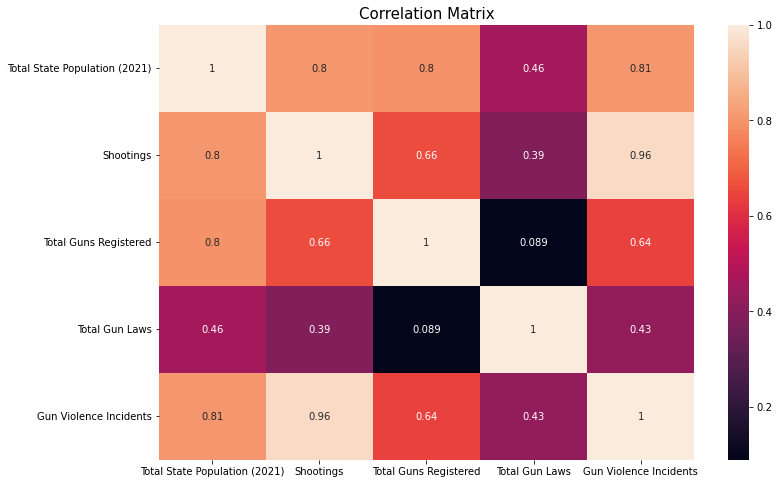

In [24]:
corr = states_pop_shoots.corr()
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix", fontsize = 15)
plt.show()

Analizando la matriz de correlacion se puede apreciar que los tiroteos tienen mayor relacion con la densidad de poblacion. Para corroborar realizaremos regresiones lineales.

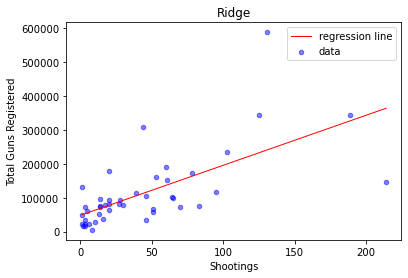

<Figure size 432x288 with 0 Axes>

In [25]:
X = states_pop_shoots[['Shootings']]
y = states_pop_shoots[['Total Guns Registered']]
xvals=np.linspace(X.min(),X.max(),200)

def train_and_plot(regr_type,d=1,a=0.1):
    gen_poly_terms = PolynomialFeatures(degree=d)
    if regr_type=="Lasso":
        poly_regression = Lasso(alpha=a)
    elif regr_type=="Ridge":
        poly_regression = Ridge(alpha=a)
    X_train = gen_poly_terms.fit_transform(X)
    poly_regression.fit(X_train, y)
    poly_vals=gen_poly_terms.transform(xvals)
    y_pred=poly_regression.predict(poly_vals)

    fig, ax = plt.subplots()
    states_pop_shoots.plot.scatter('Shootings','Total Guns Registered',color='blue',alpha=0.5,label='data',ax=ax)
    ax.plot(xvals,y_pred, color='red', linewidth=1.0, label='regression line')
    plt.legend()
    plt.title(regr_type)
    plt.figure()

#train_and_plot("Lasso")    
train_and_plot("Ridge")

De la regresion lineal entre tiroteos y el registro de armas se puede apreciar que si biein sigue una linealidad inicialmente, al aumentar la poblacion los datos se dispersan.

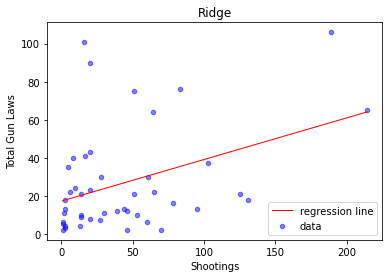

<Figure size 432x288 with 0 Axes>

In [26]:
X = states_pop_shoots[['Shootings']]
y = states_pop_shoots[['Total Gun Laws']]
xvals=np.linspace(X.min(),X.max(),200)

def train_and_plot(regr_type,d=1,a=0.1):
    gen_poly_terms = PolynomialFeatures(degree=d)
    if regr_type=="Lasso":
        poly_regression = Lasso(alpha=a)
    elif regr_type=="Ridge":
        poly_regression = Ridge(alpha=a)
    X_train = gen_poly_terms.fit_transform(X)
    poly_regression.fit(X_train, y)
    poly_vals=gen_poly_terms.transform(xvals)
    y_pred=poly_regression.predict(poly_vals)

    fig, ax = plt.subplots()
    states_pop_shoots.plot.scatter('Shootings','Total Gun Laws',color='blue',alpha=0.5,label='data',ax=ax)
    ax.plot(xvals,y_pred, color='red', linewidth=1.0, label='regression line')
    plt.legend()
    plt.title(regr_type)
    plt.figure()

#train_and_plot("Lasso")    
train_and_plot("Ridge")

No handles with labels found to put in legend.


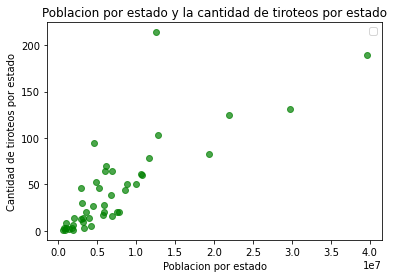

In [27]:
#lo que hizo la pipa
poblacion_estado=states_pop_shoots["Total State Population (2021)"]
tiroteos=states_pop_shoots["Shootings"]
#Ver si hay una relacion entre la poblacion de un estado y los tiroteos
#hipotesis: Ocurren mas tiroteos en estados mas populares
alpha= 0.7
plt.scatter(poblacion_estado, tiroteos, c='green',alpha=alpha)
plt.xlabel('Poblacion por estado')
plt.ylabel('Cantidad de tiroteos por estado')
plt.legend()
plt.title("Poblacion por estado y la cantidad de tiroteos por estado")
plt.show()
#Se puede ver una clara relacion, en donde los estados con mas poblacion tienden a tener mas tiroteos
#donde hay mas gente reunida suelen haber mas tiroteos.

No handles with labels found to put in legend.


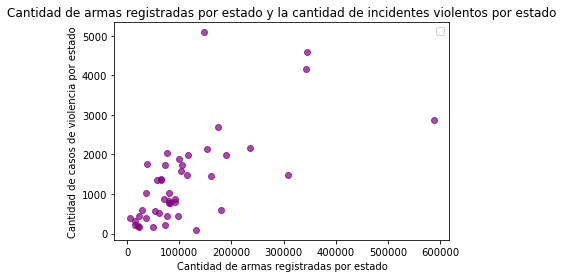

In [28]:
cant_armas_registradas=states_pop_shoots["Total Guns Registered"]
cant_casos_violentos=states_pop_shoots["Gun Violence Incidents"]
#Ver si hay una relacion entre la cantidad de armas registradas por estado y la cantidad de incidentes violentos por estado
#hipotesis: donde hay mas registros de armas deberian haber mas casos de violencia, por ende casos de violencia dependen de la cantidad de armas registradas
alpha= 0.7
plt.scatter(cant_armas_registradas, cant_casos_violentos, c='purple',alpha=alpha)
plt.xlabel('Cantidad de armas registradas por estado')
plt.ylabel('Cantidad de casos de violencia por estado')
plt.legend()
plt.title("Cantidad de armas registradas por estado y la cantidad de incidentes violentos por estado")
plt.show()
#Se puede observar una tendencia en la data, los casos en los que hay mayor cantidad de armas registradas por estado
#son los estados en donde mas se registraron incidentes, exceptuando un caso anormal que se ve que su registro de
#armas no era descomunal, sin embargo, obtuvo muchos incidentes, por lo que se concluye que en este caso tuvo que haber
#algun factor externo que influyera. 
#Tambien podemos ver que en los estados donde menos hay inscritas armas es donde menos incidentes ocurrieron
#Se confirma la hipotesis.

No handles with labels found to put in legend.


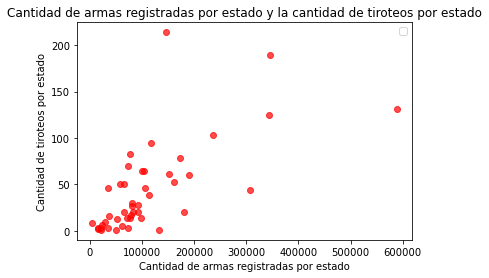

In [29]:
cant_armas_registradas=states_pop_shoots["Total Guns Registered"]
tiroteos=states_pop_shoots["Shootings"]
#Ver si hay una relacion entre la cantidad de armas registradas por estado y la cantidad de tiroteos por estado
#hipotesis: donde hay mas registros de armas deberian haber mas tiroteos, por ende la cantidad de los tiroteos dependen de la cantidad de armas registradas
alpha= 0.7
plt.scatter(cant_armas_registradas, tiroteos, c='red',alpha=alpha)
plt.xlabel('Cantidad de armas registradas por estado')
plt.ylabel('Cantidad de tiroteos por estado')
plt.legend()
plt.title("Cantidad de armas registradas por estado y la cantidad de tiroteos por estado")
plt.show()
#Se observa una clara relacion entre la cantidad de armas registradas y tiroteos por estado. En donde mas armas se registran
#Mas tiroteos hay.

No handles with labels found to put in legend.


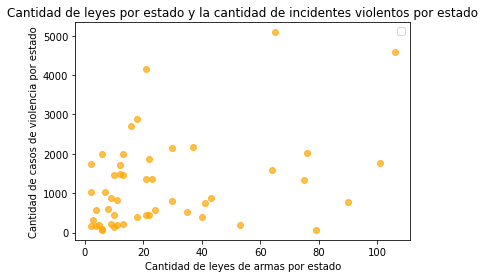

In [30]:
cant_leyes=leyes_tiroteos["Total Gun Laws"]
cant_casos_violentos=leyes_tiroteos["Gun Violence Incidents"]
#Ver si hay una relacion entre la cantidad de leyes por estado y la cantidad de incidentes violentos por estado
#hipotesis: donde hay mas leyes deberian haber menos casos de violencia, por ende casos de violencia dependen de la cantidad de leyes
alpha= 0.7
plt.scatter(cant_leyes, cant_casos_violentos, c='orange',alpha=alpha)
plt.xlabel('Cantidad de leyes de armas por estado')
plt.ylabel('Cantidad de casos de violencia por estado')
plt.legend()
plt.title("Cantidad de leyes por estado y la cantidad de incidentes violentos por estado")
plt.show()



Al realizar las graficas de dispersion podemos apreciar que el que mayor influencia de los tiroteos es con la densidad de poblacion. Creemos que la cantidad de leyes por estado no es influente ya que puede ser que las leyes sean de regulacion de armas o prohibicion de ellas por lo que habria que analizar el tipo de ley.
No se ve un patron en especifico que siga esta grafica, por ende, se concluye que no son dependientes entre si estas dos variables. Si bien, se puede pensar que al haber una gran cantidad de leyes habria un mayor control en las armas, sin embargo, podemos observar que hay varios casos en los que se tiene un gran numero de leyes y aun asi hay muchos incidentes, esto puede deberse a que  no todas las leyes son necesariamente con un proposito de control de armas sino que pueden estar a favor de estas. Esta la posibilidad que en lugares donde hay menos leyes de armas, estas sean mas prohibitibas y por ello no se necesita tanto control. En cambio, en los estados con mayores incidentes se tiende a regular mas, ya que permiten mas la tenencia de armas.

In [31]:
#Ordenamos los estados por cantidad de tiroteos
top=states_pop_shoots.sort_values(by=['Shootings'], ascending=False).head(15)
top

,State,Total State Population (2021),Shootings,Total Guns Registered,Sigla State,Total Gun Laws,Gun Violence Incidents
4,Illinois,12569321,214,146487,IL,65,5089
0,California,39613493,189,344622,CA,106,4588
1,Texas,29730311,131,588696,TX,18,2875
2,Florida,21944577,125,343288,FL,21,4156
6,Pennsylvania,12804123,103,236377,PA,37,2172
20,Louisiana,4627002,95,116831,LA,13,1987
3,New York,19299981,83,76207,NY,76,2031
7,Ohio,11714618,78,173405,OH,16,2701
16,Missouri,6169038,70,72996,MO,2,1730
9,Tennessee,6944260,65,99159,TN,22,1874


In [32]:
#Primeros 15 estados con mayor cantidad de tiroteos
top_15_tiroteos=top[["State"]]
top_15_tiroteos

,State
4,Illinois
0,California
1,Texas
2,Florida
6,Pennsylvania
20,Louisiana
3,New York
7,Ohio
16,Missouri
9,Tennessee


Del top 15 de los estados de usa con mayor cantidad de tiroteos, tenemos 14 que pertenecen al lado "ESTE o EAST" de USA. En donde el estado que no pertenece al "ESTE" (California) es el estado con mayor poblacion, factor que habria influido en su cantidad de tiroteos.
<img src="usa.jpeg">

Ahora procederemos a utilizar la data actualizada de los tiroteos inscritos donde tenemos informacion sobre la salud mental de los tiradores.

In [33]:
df_shooting5=pd.read_csv('Mass_Shootings_Dataset_Ver5.csv', encoding= 'unicode_escape')
df_shooting5

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,319,Clara Barton Elementary School,"Chicago, Illinois",1/17/1974,Clara Barton Elementary School,Close,Teachers,anger,"On January 17, 1974, a 14-year-old student ent...",1,...,4,0.0,14,NaN,NaN,Yes,Unknown,Male,41.839280,-87.688181
319,320,New Orleans Police Shootings,"New Orleans, Louisiana",12/31/1972,NaN,NaN,random,psycho,"On New Year's Eve in 1972, a 23-year-old ex-Na...",10,...,22,4.0,23,NaN,NaN,Yes,Black American or African American,Male,30.068724,-89.931474
320,321,St. Aloysius Church,"Spokane, Washington",11/11/1971,Church,Close,random,terrorism,"On November 11, 1971, a former MIT student ent...",2,...,5,0.0,NaN,NaN,NaN,Yes,White American or European American,Male,47.673674,-117.415984
321,322,Rose-Mar College of Beauty,"Mesa, Arizona",11/12/1966,Rose-Mar College of Beauty,Close,random,terrorism,"On November 12, 1966, an 18-year-old high scho...",5,...,6,0.0,18,NaN,NaN,Yes,White American or European American,Male,33.422687,-111.816320


Ahora para poder hacer un análisis sobre si los atacantes tenian problemas de salud mental, se escogerá el top 15 de estados con mayores victimas en un tiroteo.
Como primer paso, de la tabla "df_shooting5" que pertenece desde la fecha de 1966 hasta 2017 en cuanto a tiroteos, se sacan algunos datos que no serán relevantes para el análisis, tales como la fecha, el area de incidente, el resumen, la raza,etc.

In [34]:
df_shooting5.pop('Title')
df_shooting5.pop('Date')
df_shooting5.pop('S#')
df_shooting5.pop('Incident Area')
df_shooting5.pop('Open/Close Location')
df_shooting5.pop('Target')
df_shooting5.pop('Cause')
df_shooting5.pop('Summary')
df_shooting5.pop('Fatalities')
df_shooting5.pop('Policeman Killed')
df_shooting5.pop('Age')
df_shooting5.pop('Employeed (Y/N)')
df_shooting5.pop('Employed at')
df_shooting5.pop('Race')
df_shooting5.pop('Gender')
df_shooting5.pop('Latitude')
df_shooting5.pop('Longitude')
df_shooting5.pop('Injured')

0       20
1        0
2        3
3      527
4        2
      ... 
318      3
319     13
320      4
321      1
322     32
Name: Injured, Length: 323, dtype: int64

In [35]:
df_shooting5

,Location,Total victims,Mental Health Issues
0,"Sutherland Springs, TX",46,No
1,"Thornton, CO",3,No
2,"Edgewood, MD",6,No
3,"Las Vegas, NV",585,Unclear
4,"San Francisco, CA",5,Yes
...,...,...,...
318,"Chicago, Illinois",4,Yes
319,"New Orleans, Louisiana",22,Yes
320,"Spokane, Washington",5,Yes
321,"Mesa, Arizona",6,Yes


In [36]:
df=df_shooting5.copy()
df

,Location,Total victims,Mental Health Issues
0,"Sutherland Springs, TX",46,No
1,"Thornton, CO",3,No
2,"Edgewood, MD",6,No
3,"Las Vegas, NV",585,Unclear
4,"San Francisco, CA",5,Yes
...,...,...,...
318,"Chicago, Illinois",4,Yes
319,"New Orleans, Louisiana",22,Yes
320,"Spokane, Washington",5,Yes
321,"Mesa, Arizona",6,Yes


Ordenamos los estados por cantidad de tiroteos
Se puede observar que del top 15 de casos con mas victimas, un caso solamente es de una persona sin problemas de salud mental
4 casos son sin determinar y diez casos son de personas con salud mental. Por lo que en este top 15 la mayoria de atacantes si tenia problemas de salud mental, es un dato no menor para tomar en cuenta en los tiroteos donde ha habido mas victimas.

In [37]:

top_victims=df.sort_values(by=['Total victims'], ascending=False).head(15)
top_victims


,Location,Total victims,Mental Health Issues
3,"Las Vegas, NV",585,Unclear
13,"Orlando, Florida",102,Unclear
182,"Aurora, Colorado",82,Yes
220,"Blacksburg, Virginia",55,Yes
322,"Austin, Texas",48,Yes
0,"Sutherland Springs, TX",46,No
201,"Fort Hood, Texas",45,Yes
287,"Killeen, Texas",43,Yes
306,"San Ysidro, California",40,Yes
249,"Littleton, Colorado",37,Yes


Se puede concluir según el gráfico de torta que la mayoria de los tiroteos con mas victimas (top 15) son en los que el atacante tiene problemas de salud mental.

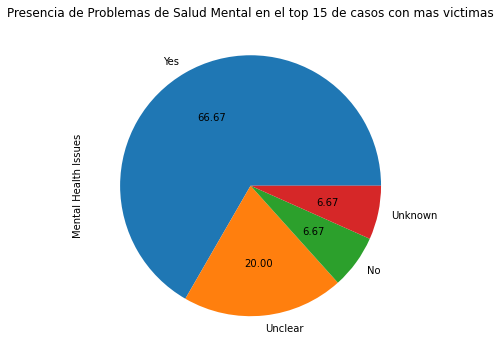

In [38]:
plot = top_victims['Mental Health Issues'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Presencia de Problemas de Salud Mental en el top 15 de casos con mas victimas')


Ahora para poder hacer un mejor análisis con los Estados, es que se aplica un código para que en la columna de "Location" de "df_shooting5" solo se pueda ver el nombre del estado y no otra información, lo que servirá para pdoer sacar otros gráficos importantes que explicaremos mas adelante.

In [39]:
df_state=df_shooting5.copy()
df_state.pop('Total victims')
df_state

,Location,Mental Health Issues
0,"Sutherland Springs, TX",No
1,"Thornton, CO",No
2,"Edgewood, MD",No
3,"Las Vegas, NV",Unclear
4,"San Francisco, CA",Yes
...,...,...
318,"Chicago, Illinois",Yes
319,"New Orleans, Louisiana",Yes
320,"Spokane, Washington",Yes
321,"Mesa, Arizona",Yes


In [40]:
df_state['Location']= df_state['Location'].str.split(', ')

In [41]:
#df_state=df_state.dropna()
count=0
l=[]
df_state = df_state.replace([np.nan],[1])
for i in df_state['Location']:
    count+=1
    if(i == 1):
        continue
    elif(len(i) == 2):        
        if('TX' == i[1]):
            df_state['Location'][count-1] = 'Texas'
        elif('CO' == i[1]):
            df_state['Location'][count-1] = 'Colorado'
        elif('MD' == i[1]):
            df_state['Location'][count-1] = 'Maryland'
        elif('NV' == i[1]):
            df_state['Location'][count-1] = 'Nevada'
        elif('CA' == i[1]):
            df_state['Location'][count-1] = 'California'
        elif('PA' == i[1]):
            df_state['Location'][count-1] = 'Pensilvania'
        elif('WA' == i[1]):
            df_state['Location'][count-1] = 'Washington'
        elif('LA' == i[1]):
            df_state['Location'][count-1] = 'Los angeles'
        else:
            df_state['Location'][count-1] = i[1]
            
    elif(len(i) == 1):
        if(i == 'Washington D.C.'):
            df_state['Location'][count-1] = 'Washington'
        else:
            continue
    elif(len(i)== 5):
        if(i == 'Pennsylvania'):
            df_state['Location'][count-1] = 'Pensilvania'
        else:
            continue
    elif(len(i)== 3):
        if(i == 'New Mexico'):
            df_state['Location'][count-1] = 'New Mexico'
        else:
            continue
               
df_state

,Location,Mental Health Issues
0,Texas,No
1,Colorado,No
2,Maryland,No
3,Nevada,Unclear
4,California,Yes
...,...,...
318,Illinois,Yes
319,Louisiana,Yes
320,Washington,Yes
321,Arizona,Yes


Luego de finalizado el ordenamiento de la columna "Location", se ocupa esta columna mencionada y la columna de salud mental "Mental Health Issues" para obtener dos gráficos de torta importante para el análisis, de los cuales se seperarán en la cantidad de casos por estado en que los atacantes tienen o no problemas de salud mental.

In [42]:
df_yes= df_state[(df_state['Mental Health Issues'] =='Yes')]

In [43]:
df_no=df_state[(df_state['Mental Health Issues'] =='No')]

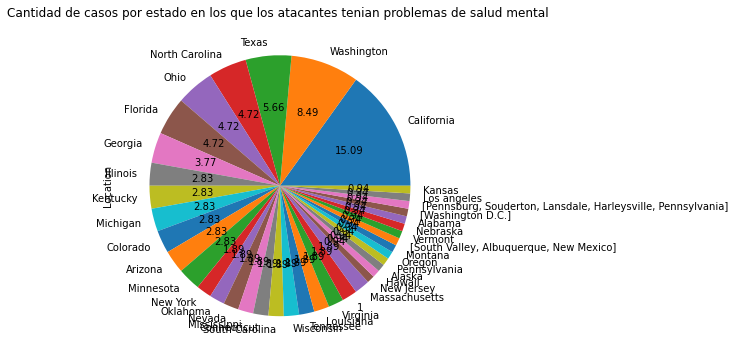

In [44]:
plot_yes = df_yes['Location'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Cantidad de casos por estado en los que los atacantes tenian problemas de salud mental ')

Se puede observar que California tiene la mayor cantidad de atacantes con problemas de salud mental y lo sigue Washington, Texas, North Carolina y Ohio.

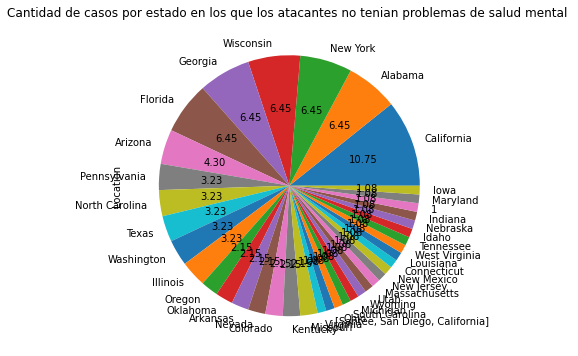

In [45]:
plot_no = df_no['Location'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Cantidad de casos por estado en los que los atacantes no tenian problemas de salud mental ')

Luego se puede observar que los estados con mayor numero de atacantes que no tienen salud mental es California, seguido de Alabama, New York, Wisconsin,etc.  
Se puede observar que no se está siguiendo ningún patrón en específico, pero si podemos notar por ejemplo los primeros indicios de que probablemente la salud mental en los atacantes no sea la principal causa de los tiroreos en Estado Unidos, por lo que ahora se agregaran otro factores determinantes para el caso.

A continuación se calculará el porcentaje de atacantes con problemas de salud mental por estado, donde primero se calculará la frecuencia y luego en el mismo código se calculará el porcentaje, por lo que al final se obtendrá un porcentaje que dice si los atacantes en ese estado tenian problemas de salud mental.

In [46]:
import pandas as pd

lista=df_yes['Location'].tolist()
lista[17]='Pennsylvania'
lista[22]='Washington'
lista[27]='New Mexico'
lista.remove(1)
lista.remove(1)

(unique, counts) = np.unique(lista, return_counts=True)
data_freq=pd.DataFrame()
i=0
while i<np.size(counts):
    counts[i]=(counts[i]/36)*100
    i=i+1

data_freq['State']=unique
data_freq['% freq Mental Health']=counts
data_freq

,State,% freq Mental Health
0,Alabama,2
1,Alaska,2
2,Arizona,8
3,California,44
4,Colorado,8
5,Connecticut,5
6,Florida,13
7,Georgia,11
8,Hawaii,2
9,Illinois,8


Por lo que ahora se une este porcentaje de frecuencias de salud mental al dataframe "states_pop_shoots" que contiene datos como Cantidad de Leyes regulatorias de armas, Cantidad de población, Cantidad de armas registradas y cantidad de tiroteos. Se utiliza la función merge con la variable "State" para juntar los datos por Estado. Pero antes se observará que es lo que sucede con los tiroteos, las leyes de armas y las armas registradas, desempleo, terorismos y otras causas.

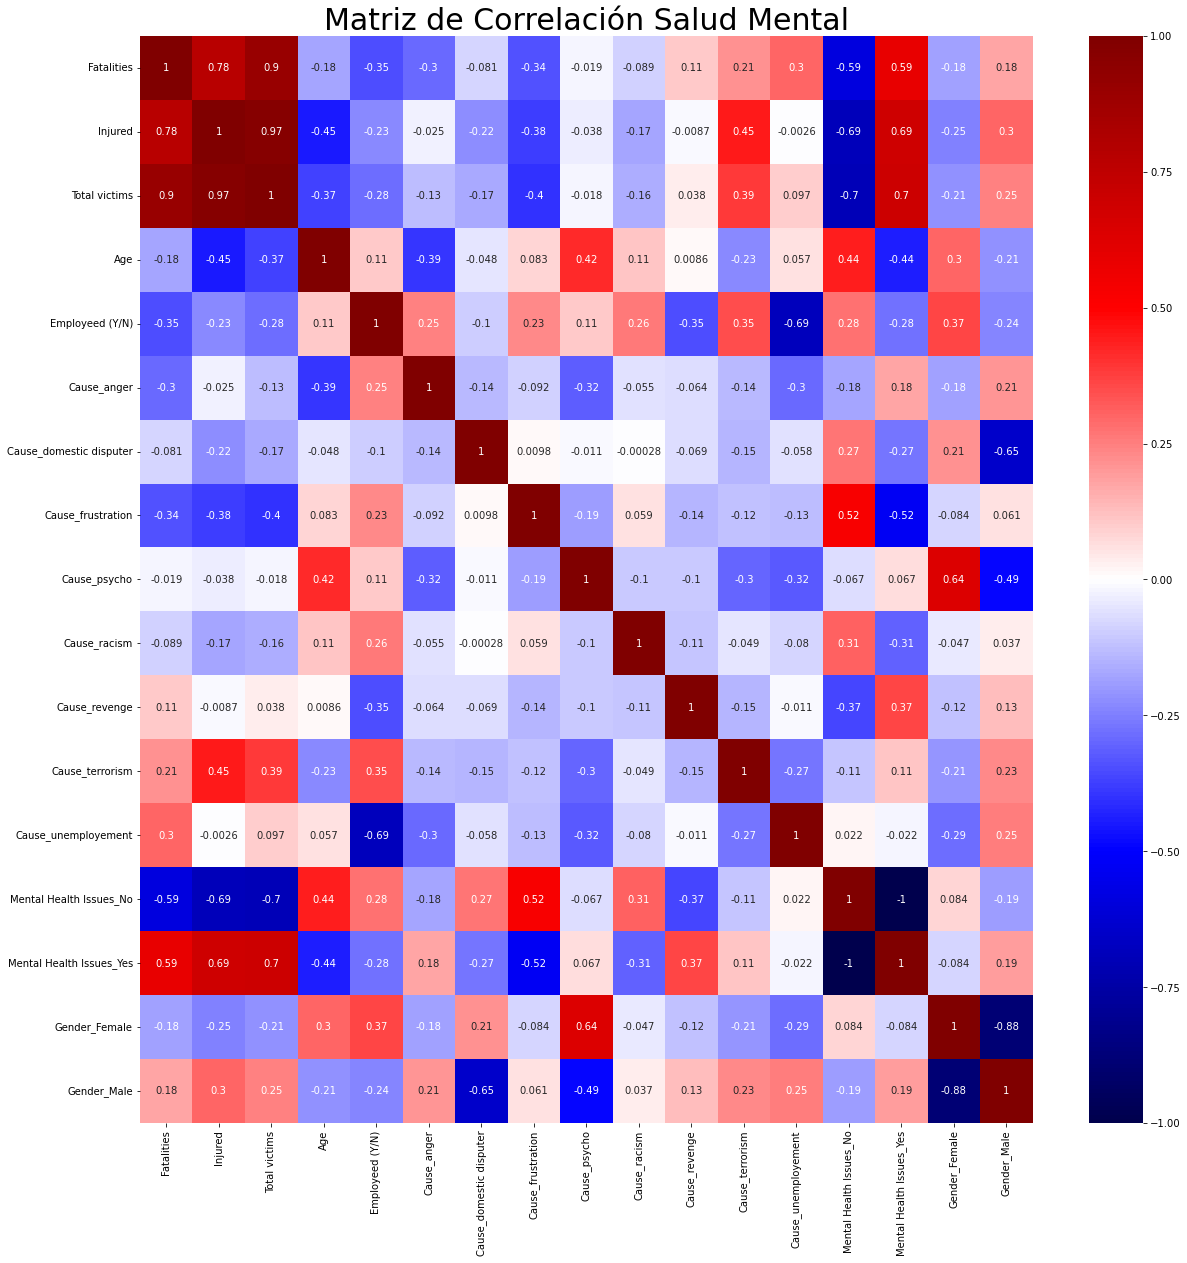

In [47]:
df_shooting=pd.read_csv('Mass_Shootings_Dataset_Ver5.csv', encoding= 'unicode_escape')
deep_copy = df_shooting.copy()
deep_copy.pop('Latitude')
deep_copy.pop('Longitude')
deep_copy.pop('Summary')
deep_copy.pop('Employed at')

deep_copy.pop('Open/Close Location')
deep_copy.pop('Title')
deep_copy.pop('Location')
deep_copy.pop('Incident Area')
deep_copy.pop('Policeman Killed')
deep_copy.pop('Date')
deep_copy.pop('Race')
#deep_copy.pop('Age')
deep_copy = deep_copy.dropna(axis=0)
deep_copy["Age"] = deep_copy["Age"].astype(str).astype(int) 
deep_copy.pop('Target')
deep_copy.pop('S#')


df_shooting_mentalYes=deep_copy[deep_copy['Mental Health Issues']=='Yes']
df_shooting_mentalNo=deep_copy[deep_copy['Mental Health Issues']=='No']
df_shooting_mentalUnknown=deep_copy[deep_copy['Mental Health Issues']=='Unknown']
df_shooting_mentalUnclear=deep_copy[deep_copy['Mental Health Issues']=='Unclear']
shootings = pd.concat([df_shooting_mentalYes, df_shooting_mentalNo])


#Matriz correlación
import seaborn as sns
import matplotlib.pyplot as plt
def plot_corr_matrix(data,features=None,annot=True,s=(20,20)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Matriz de Correlación Salud Mental", fontsize = 30)
    plt.show()
binarios_data_1=pd.get_dummies(shootings)
##############################################
binarios_data_1.pop('Gender_Male/Female')
########################################
correlacion_1=binarios_data_1.corr(method='pearson')
plot_corr_matrix(correlacion_1)

Se puede observar que hay factores como el racismo,frustración, problemas domésticos y desempleo que en los cuales las personas que realizaron estos ataques no tienen en su mayoria problemas de salud mental, por ejemplo, la venganza se relaciona con la salud mental. En general se ve que la salud mental es una de las causas, pero hay muchas otras causas que producen estos tiroteos.

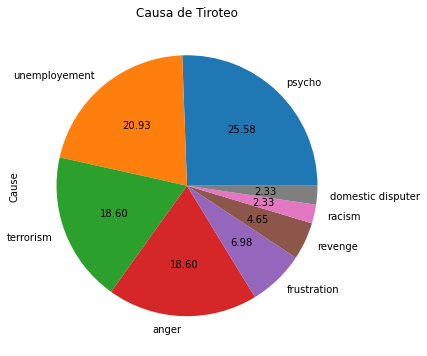

In [48]:

plot = shootings['Cause'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Causa de Tiroteo')


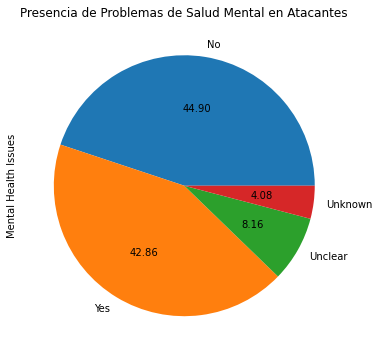

In [49]:
plot = deep_copy['Mental Health Issues'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Presencia de Problemas de Salud Mental en Atacantes')

Se puede observar otros causantes diferentes a la salud mental como desempleo, terorrismo, enojo, frustación, por lo que acá también se pued enotar los primeros indicios de que probablemente que los tiroteos no esten relacionados directamente con la salud mental si no que hay otro factores.

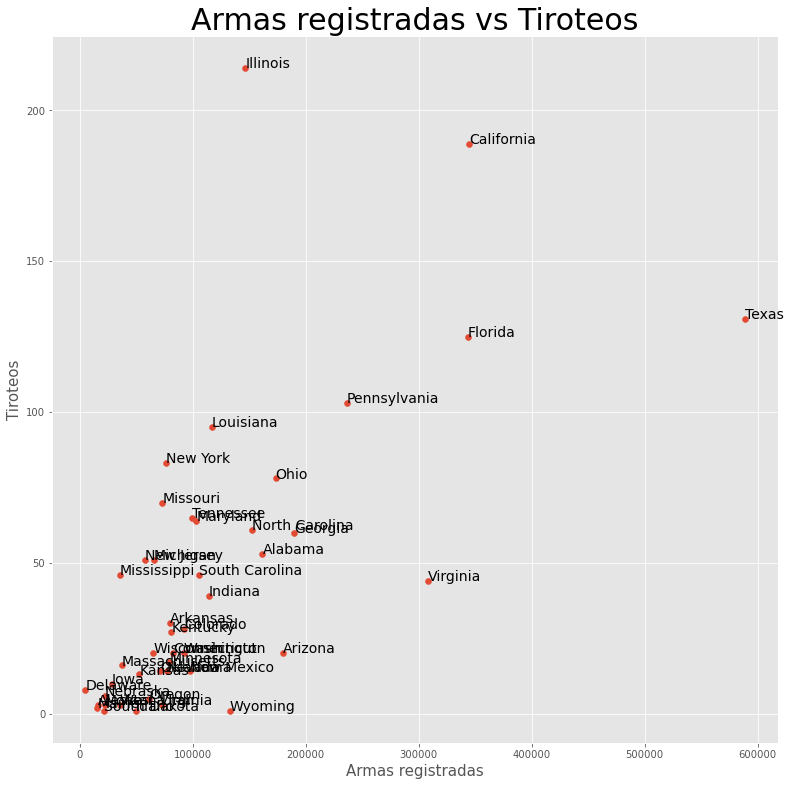

<Figure size 7200x7200 with 0 Axes>

In [50]:
#ARMAS REGISTRADAS
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (13, 13)
plt.style.use('ggplot')
plt.scatter(states_pop_shoots['Total Guns Registered'],states_pop_shoots['Shootings'])

for i in states_pop_shoots['State'].keys():
    iso= states_pop_shoots['State'][i]
    plt.annotate(iso, ( states_pop_shoots['Total Guns Registered'][i],states_pop_shoots['Shootings'][i]),fontsize=14)

plt.title("Armas registradas vs Tiroteos",fontsize=30)
plt.xlabel("Armas registradas",fontsize=15)
plt.ylabel("Tiroteos",fontsize=15)
#plt.legend()
#plt.figure(figsize=(8,6))
#fig=plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
fig.set_figheight(100)
fig.set_figwidth(100)

Se puede observar en el gráfico anterior que en estados como Texas que tienen muchas armas registradas tienen tiroteos pero no tantos como California por ejemplo que tiene menos armas registradas pero muchos mas tiroteos.

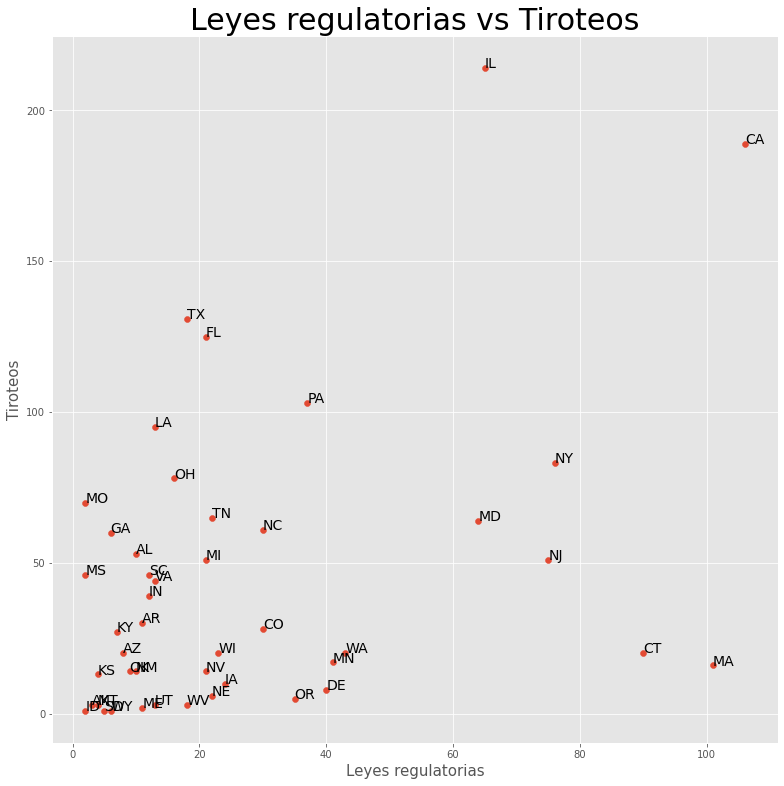

<Figure size 7200x7200 with 0 Axes>

In [51]:
#LEYES

plt.rcParams['figure.figsize'] = (13, 13)
plt.style.use('ggplot')
#plt.scatter(data_3['Total Guns Registered'],data_3['GunViolence Incidents by State'])
plt.scatter(states_pop_shoots['Total Gun Laws'],states_pop_shoots['Shootings'])

for i in states_pop_shoots['Sigla State'].keys():
    iso= states_pop_shoots['Sigla State'][i]
    plt.annotate(iso, ( states_pop_shoots['Total Gun Laws'][i],states_pop_shoots['Shootings'][i]),fontsize=14)

plt.title("Leyes regulatorias vs Tiroteos",fontsize=30)
plt.xlabel("Leyes regulatorias",fontsize=15)
plt.ylabel("Tiroteos",fontsize=15)
#plt.legend()
#fig=plt.figure(figsize=(20,20))
fig=plt.rcParams["figure.figsize"] = (1, 1)
fig = plt.figure()
fig.set_figheight(100)
fig.set_figwidth(100)

Se puede observar que los datos estan mas dispersos en cuanto a leyes regulatorias donde hay estados que siguen la lógica de que si hay mayores leyes regulatorias hay menos tiroteos, pero hay otros estados que no siguen la lógica donde a pesar de que hayan muchas leyes regulatorias hay muchos tiroteos. Esto se verá reflejado de manera más explicita en comparación con la salud mental en los siguientes códigos y markdowns.

In [52]:
states_pop_shoots_freq= pd.merge(states_pop_shoots,data_freq, on=["State"])
states_pop_shoots_freq

,State,Total State Population (2021),Shootings,Total Guns Registered,Sigla State,Total Gun Laws,Gun Violence Incidents,% freq Mental Health
0,California,39613493,189,344622,CA,106,4588,44
1,Texas,29730311,131,588696,TX,18,2875,16
2,Florida,21944577,125,343288,FL,21,4156,13
3,New York,19299981,83,76207,NY,76,2031,5
4,Illinois,12569321,214,146487,IL,65,5089,8
5,Georgia,10830007,60,190050,GA,6,1994,11
6,Pennsylvania,12804123,103,236377,PA,37,2172,5
7,Ohio,11714618,78,173405,OH,16,2701,13
8,North Carolina,10701022,61,152238,NC,30,2141,13
9,Tennessee,6944260,65,99159,TN,22,1874,5


Ahora con los datos obtenidos por estado en el dataframe recién construido, hacemos una matriz de correlación para saber si justamente si los tiroteos estan mas relacionados con otros factores o la salud mental es el principal.

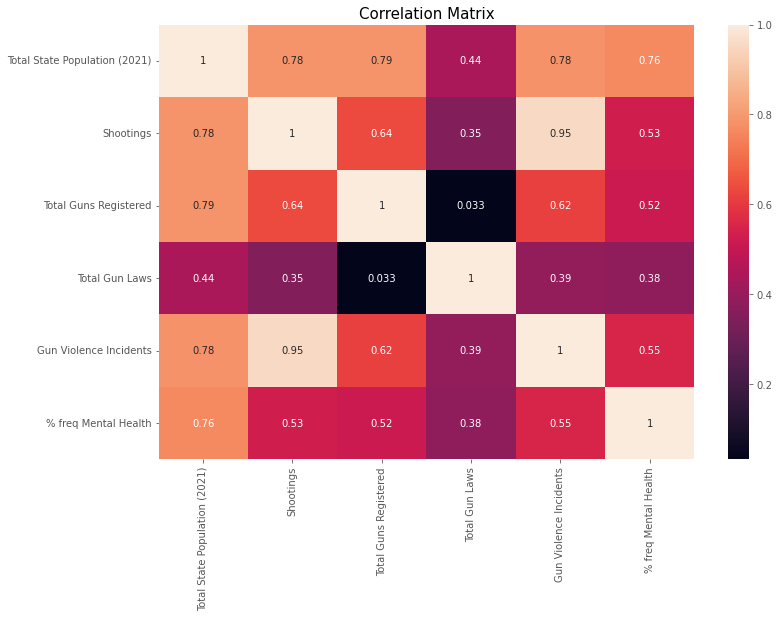

In [53]:
corr = states_pop_shoots_freq.corr()
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)
ax= sns.heatmap(corr,annot=True,
    xticklabels=corr.columns,
    yticklabels=corr.columns)
plt.title("Correlation Matrix", fontsize = 15)
plt.show()

Como podemos observar en la amtriz de correlación en cuanto a los tiroteos "Shootings" estos tienen mayor correlación con factores como la cantidad de población por estado, y las armas registradas en comparación con la salud mental, pero la salud mental no se queda atrás ya que al menos alcanza un 0.53 de correlación lo que es un valor no despreciable ya que como observamos en análisis anteriores en el top 15 de estados con mayores victimas en general la mayoria de atacantes si tenian problemas de Salud mental. 
Entonces podemos decir que el factor población si tiene mucha relación con los tiroteos y como se vió anteriormente en los análsis lineales se puede decir que a mayor población hay existencia de mas tiroteos.
En cuanto al factor armas registradas se puede deducir algo muy parecido respecto a la matriz de correlación y el análisis lineal ya que al haber una mayor cantidad de armas registradas hay mas posibilidad de que haya mas tiroteos, pero esta relación no es tan directa como la de la población, ya que en esta (de cantidad de armas registradas) los datos son mas dispersos, por lo el resultado no es tan conclusivo.
Con respecto a otro valor que esta relacionado negativamente con los tiroteos es la cantidad de leyes regulatorias de armas, ya según los resultados vistos que un estado tenga mas leyes regulatorias de armas no significa que habrán menos tiroteos, de hecho en algunos casos puntuales hay mas tiroteos y tiene mas leyes regulatorias como es el caso de de California (CA) pero por el otro lado existe el estado de Masachusetts (MA) que si tiene muchas leyes pero pocos tiroteos, este último caso es el más lógico pero no siempre lo más lógico se cumple, por lo que se podría decir que en California hay un grave problema en el manejo de armas que debe ser controlado para una sana convivencia en la población.

De la siguente imagen se puede apreciar que para los estados con mayor cantidad de los tiroteos se tiene que los tiradores no presentan un patron de salud mental. Por lo que concluimos que la densidad poblacional es influente con la cantidad de tiroteos.
De la imagen la cruz de color azul son que los tiradores presentan problemas de salud mental, cruz verde los que no tienen problemas de salud mental y las rojas son los estados con mas tiroteos.
<img src="usa2.jpeg">